In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading image
image1 = cv2.imread('images403/image1.jpg', 0)

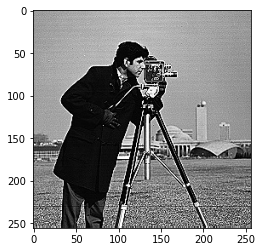

In [17]:
plt.imshow(image1, 'gray')
plt.show()

In [18]:
# Fast Fourier Transformation
image_fft1 = np.fft.fft2(image1)

# Shift the zero-frequency component to the center of the spectrum.
image_fft2 = np.fft.fftshift(image_fft1)

# Decentralized spectru,
image_fft3 = np.fft.ifftshift(image_fft2)
# 2D inverse discrete Fourier Transform.
image_fft4 = np.fft.ifft2(image_fft3)

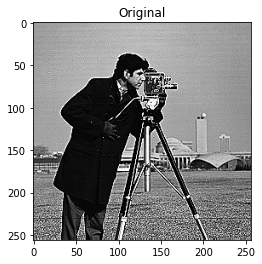

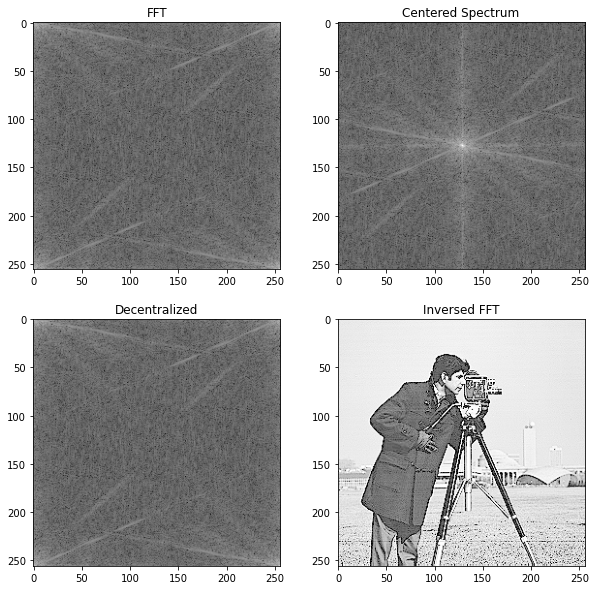

In [19]:
# Plot the images.
plt.imshow(image1, 'gray')
plt.title("Original")
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(221)

plt.imshow(np.log(1+np.abs(image_fft1)), 'gray')
plt.title("FFT")

plt.subplot(222)
plt.imshow(np.log(1+np.abs(image_fft2)), 'gray')
plt.title("Centered Spectrum")

plt.subplot(223)
plt.imshow(np.log(1+np.abs(image_fft3)), 'gray')
plt.title("Decentralized")

plt.subplot(224)
plt.imshow(np.log(1+np.abs(image_fft4)), 'gray')
plt.title("Inversed FFT")

plt.show()

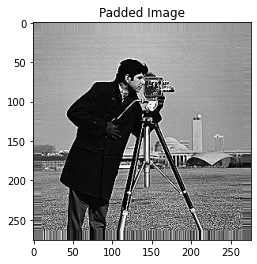

In [20]:
# Padding size
pad_size = 10  

# Pad the image with nearest row and column
padded_image = cv2.copyMakeBorder(image1, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_REPLICATE)

# Plot images
plt.imshow(padded_image, 'gray')
plt.title("Padded Image")
plt.show()

pimage_fft1 = np.fft.fft2(padded_image)
pimage_fft2 = np.fft.fftshift(pimage_fft1)
pimage_fft3 = np.fft.ifftshift(pimage_fft2)
pimage_fft4 = np.fft.ifft2(pimage_fft3)

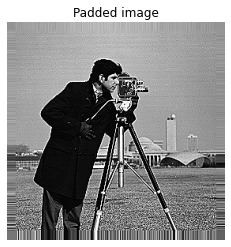

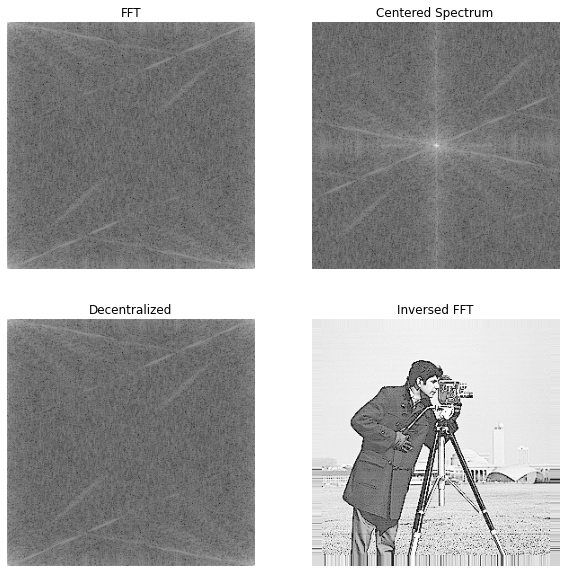

In [86]:
# Plot the image
plt.imshow(padded_image, 'gray')
plt.title("Padded image")
plt.axis('off')
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(221)

plt.imshow(np.log(1+np.abs(pimage_fft1)), 'gray')
plt.title("FFT")
plt.axis('off')

plt.subplot(222)
plt.imshow(np.log(1+np.abs(pimage_fft2)), 'gray')
plt.title("Centered Spectrum")
plt.axis('off')

plt.subplot(223)
plt.imshow(np.log(1+np.abs(pimage_fft3)), 'gray')
plt.title("Decentralized")
plt.axis('off')

plt.subplot(224)
plt.imshow(np.log(1+np.abs(pimage_fft4)), 'gray')
plt.title("Inversed FFT")
plt.axis('off')

plt.show()

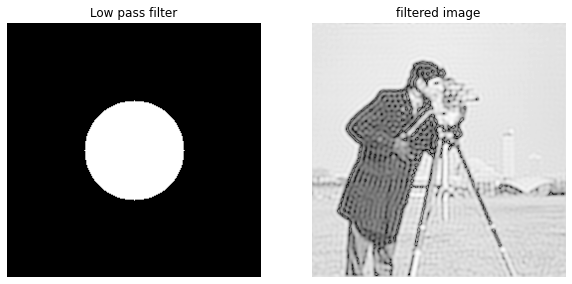

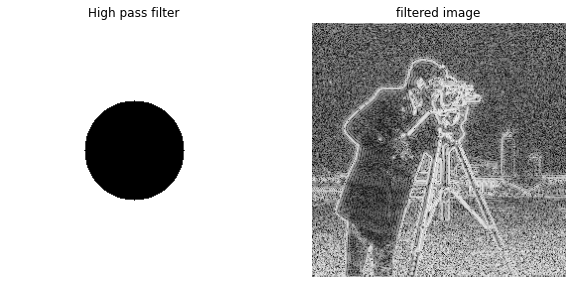

In [21]:
# Low pass filter
M,N = image1.shape


H = np.zeros((M,N), dtype=np.float32)

# Choose the threshold
D0 = 50

# Calculate H
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0

plt.figure(figsize=(10,10))

# Plot H
plt.subplot(121)
plt.imshow(H, cmap='gray')
plt.title("Low pass filter")
plt.axis('off')


# Apply Ideal Low Pass Filtering
filtered = image_fft2 * H


# Inverse Fourier Transform
filtered_2 = np.fft.ifftshift(filtered)
filtered_3  = np.fft.ifft2(filtered_2)

# Plot the image
plt.subplot(122)
plt.imshow(np.log(1+np.abs(filtered_3)), 'gray')
plt.axis('off')
plt.title('filtered image')
plt.show()


# High pass filter
H = 1 - H
plt.figure(figsize=(10,10))

plt.subplot(121)
plt.imshow(H, cmap='gray')
plt.title('High pass filter')
plt.axis('off')


# Apply Ideal High Pass Filtering
filtered = image_fft2 * H

# Inverse Fourier Transform
filtered_2 = np.fft.ifftshift(filtered)
filtered_3  = np.fft.ifft2(filtered_2)

# Plot the images
plt.subplot(122)
plt.imshow(np.log(1+np.abs(filtered_3)), 'gray')
plt.axis('off')
plt.title('filtered image')
plt.show()


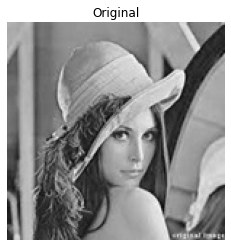

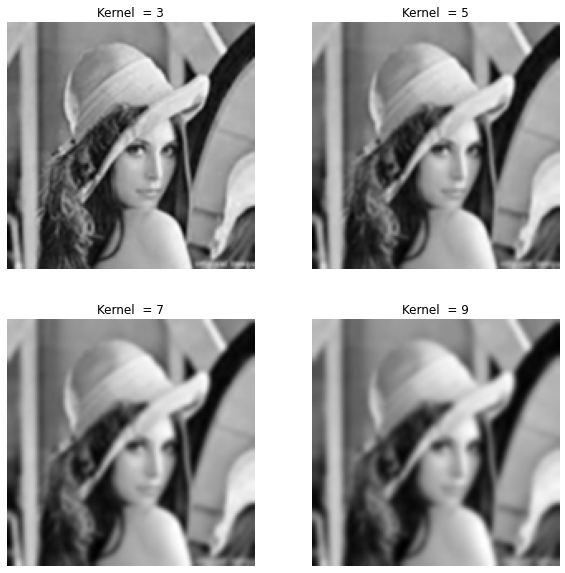

In [26]:
from scipy.ndimage import gaussian_filter

image2 = cv2.imread('images403/image2.jpg', 0)
# Original Image
plt.imshow(image2, 'gray')
plt.axis('off')
plt.title('Original')
plt.show()

plt.figure(figsize=(10,10))

# Gaussian smoothing with kernel = 3
plt.subplot(221)
filtered3 = cv2.GaussianBlur(image2, (3, 3), 0)
plt.imshow(filtered3, 'gray')
plt.axis('off')
plt.title('Kernel  = 3')

# Gaussian smoothing with kernel = 5
plt.subplot(222)
filtered5 = cv2.GaussianBlur(image2, (5, 5), 0)
plt.imshow(filtered5, 'gray')
plt.axis('off')
plt.title('Kernel  = 5')

# Gaussian smoothing with kernel = 7
plt.subplot(223)
filtered7 = cv2.GaussianBlur(image2, (7, 7), 0)
plt.imshow(filtered7, 'gray')
plt.axis('off')
plt.title('Kernel  = 7')

# Gaussian smoothing with kernel = 9
plt.subplot(224)
filtered9 = cv2.GaussianBlur(image2, (9, 9), 0)
plt.imshow(filtered9, 'gray')
plt.axis('off')
plt.title('Kernel  = 9')

plt.show()

Diameter of hole 1 : 85.00019836425781
Diameter of hole 2 : 37.88866424560547
Diameter of hole 3 : 37.811805725097656
Diameter of hole 4 : 323.4596252441406
Diameter of hole 5 : 70.30641174316406
Diameter of hole 6 : 37.866920471191406


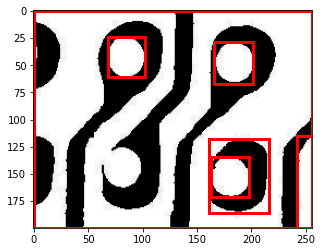

In [71]:
from matplotlib.patches import Rectangle

image3 = cv2.imread('images403/holes.jpg', 0)

# Invert the image (A') to use contours
image3 = np.invert(image3)

# erode and dilate the image using same size kernel to save the actual size but also have precise circles
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
eroded_image = cv2.erode(image3, kernel, iterations=1)
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)


plt.imshow(dilated_image,'gray')

# Find contours of holes
contours, _ = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
hole_count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 100:  # Filter out small noise
        x, y, w, h = cv2.boundingRect(contour)

        # Create Rectangle patch
        rect = Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')

        # Add Rectangle patch to the current axes
        plt.gca().add_patch(rect)
        (x,y), radius = cv2.minEnclosingCircle(contour)
        diameter = radius * 2
        
        # Print diameter
        print("Diameter of hole", hole_count + 1, ":", diameter)
        hole_count += 1
        
plt.show()


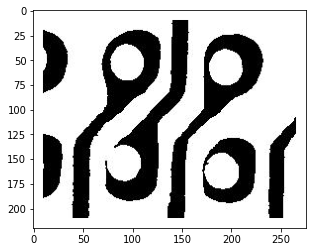

Diameter of hole 1 : 24.18340492248535
Diameter of hole 2 : 26.32655143737793
Diameter of hole 3 : 23.482954025268555
Diameter of hole 4 : 24.51757049560547


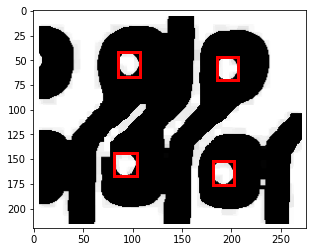

In [72]:
from matplotlib.patches import Rectangle

image3 = cv2.imread('images403/holes.jpg', 0)
pad_size = 10

# Pad the image So that the margins aren't counted as holes
image3 = cv2.copyMakeBorder(image3, pad_size, pad_size, pad_size, pad_size, borderType=cv2.BORDER_CONSTANT)

# Invert the image (A') to use counter
image3 = np.invert(image3)
plt.imshow(image3,'gray')
plt.show()

# Use different kernel sizes for eroding and dilating so that we can form better circles
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8, 8))
eroded_image = cv2.erode(image3, kernel, iterations=2)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
dilated_image = cv2.dilate(eroded_image, kernel, iterations=1)
plt.imshow(dilated_image,'gray')

# Find contours of holes
contours, _ = cv2.findContours(dilated_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours
hole_count = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if 1000>area > 100:  # Filter out small noise
        x, y, w, h = cv2.boundingRect(contour)

        # Create Rectangle patch
        rect = Rectangle((x, y), w, h, linewidth=3, edgecolor='r', facecolor='none')

        # Add Rectangle patch to the current axes
        plt.gca().add_patch(rect)
        (x,y), radius = cv2.minEnclosingCircle(contour)
        diameter = radius * 2
        
        # Finds correct holes but the diameters are changed.
        print("Diameter of hole", hole_count + 1, ":", diameter)
        
        hole_count += 1
plt.show()